In [1]:
p = [3/4, 1/4]
sp.stats.entropy(p, base=2)

0.8112781244591328

In [2]:
p = [1/4, 3/4]
sp.stats.entropy(p, base=2)

0.8112781244591328

In [3]:
p = [1/3, 2/3]
sp.stats.entropy(p, base=2)

0.9182958340544894

In [4]:
p = [1, 0]
sp.stats.entropy(p, base=2)

0.0

In [6]:
6/8 * 0.92


0.6900000000000001

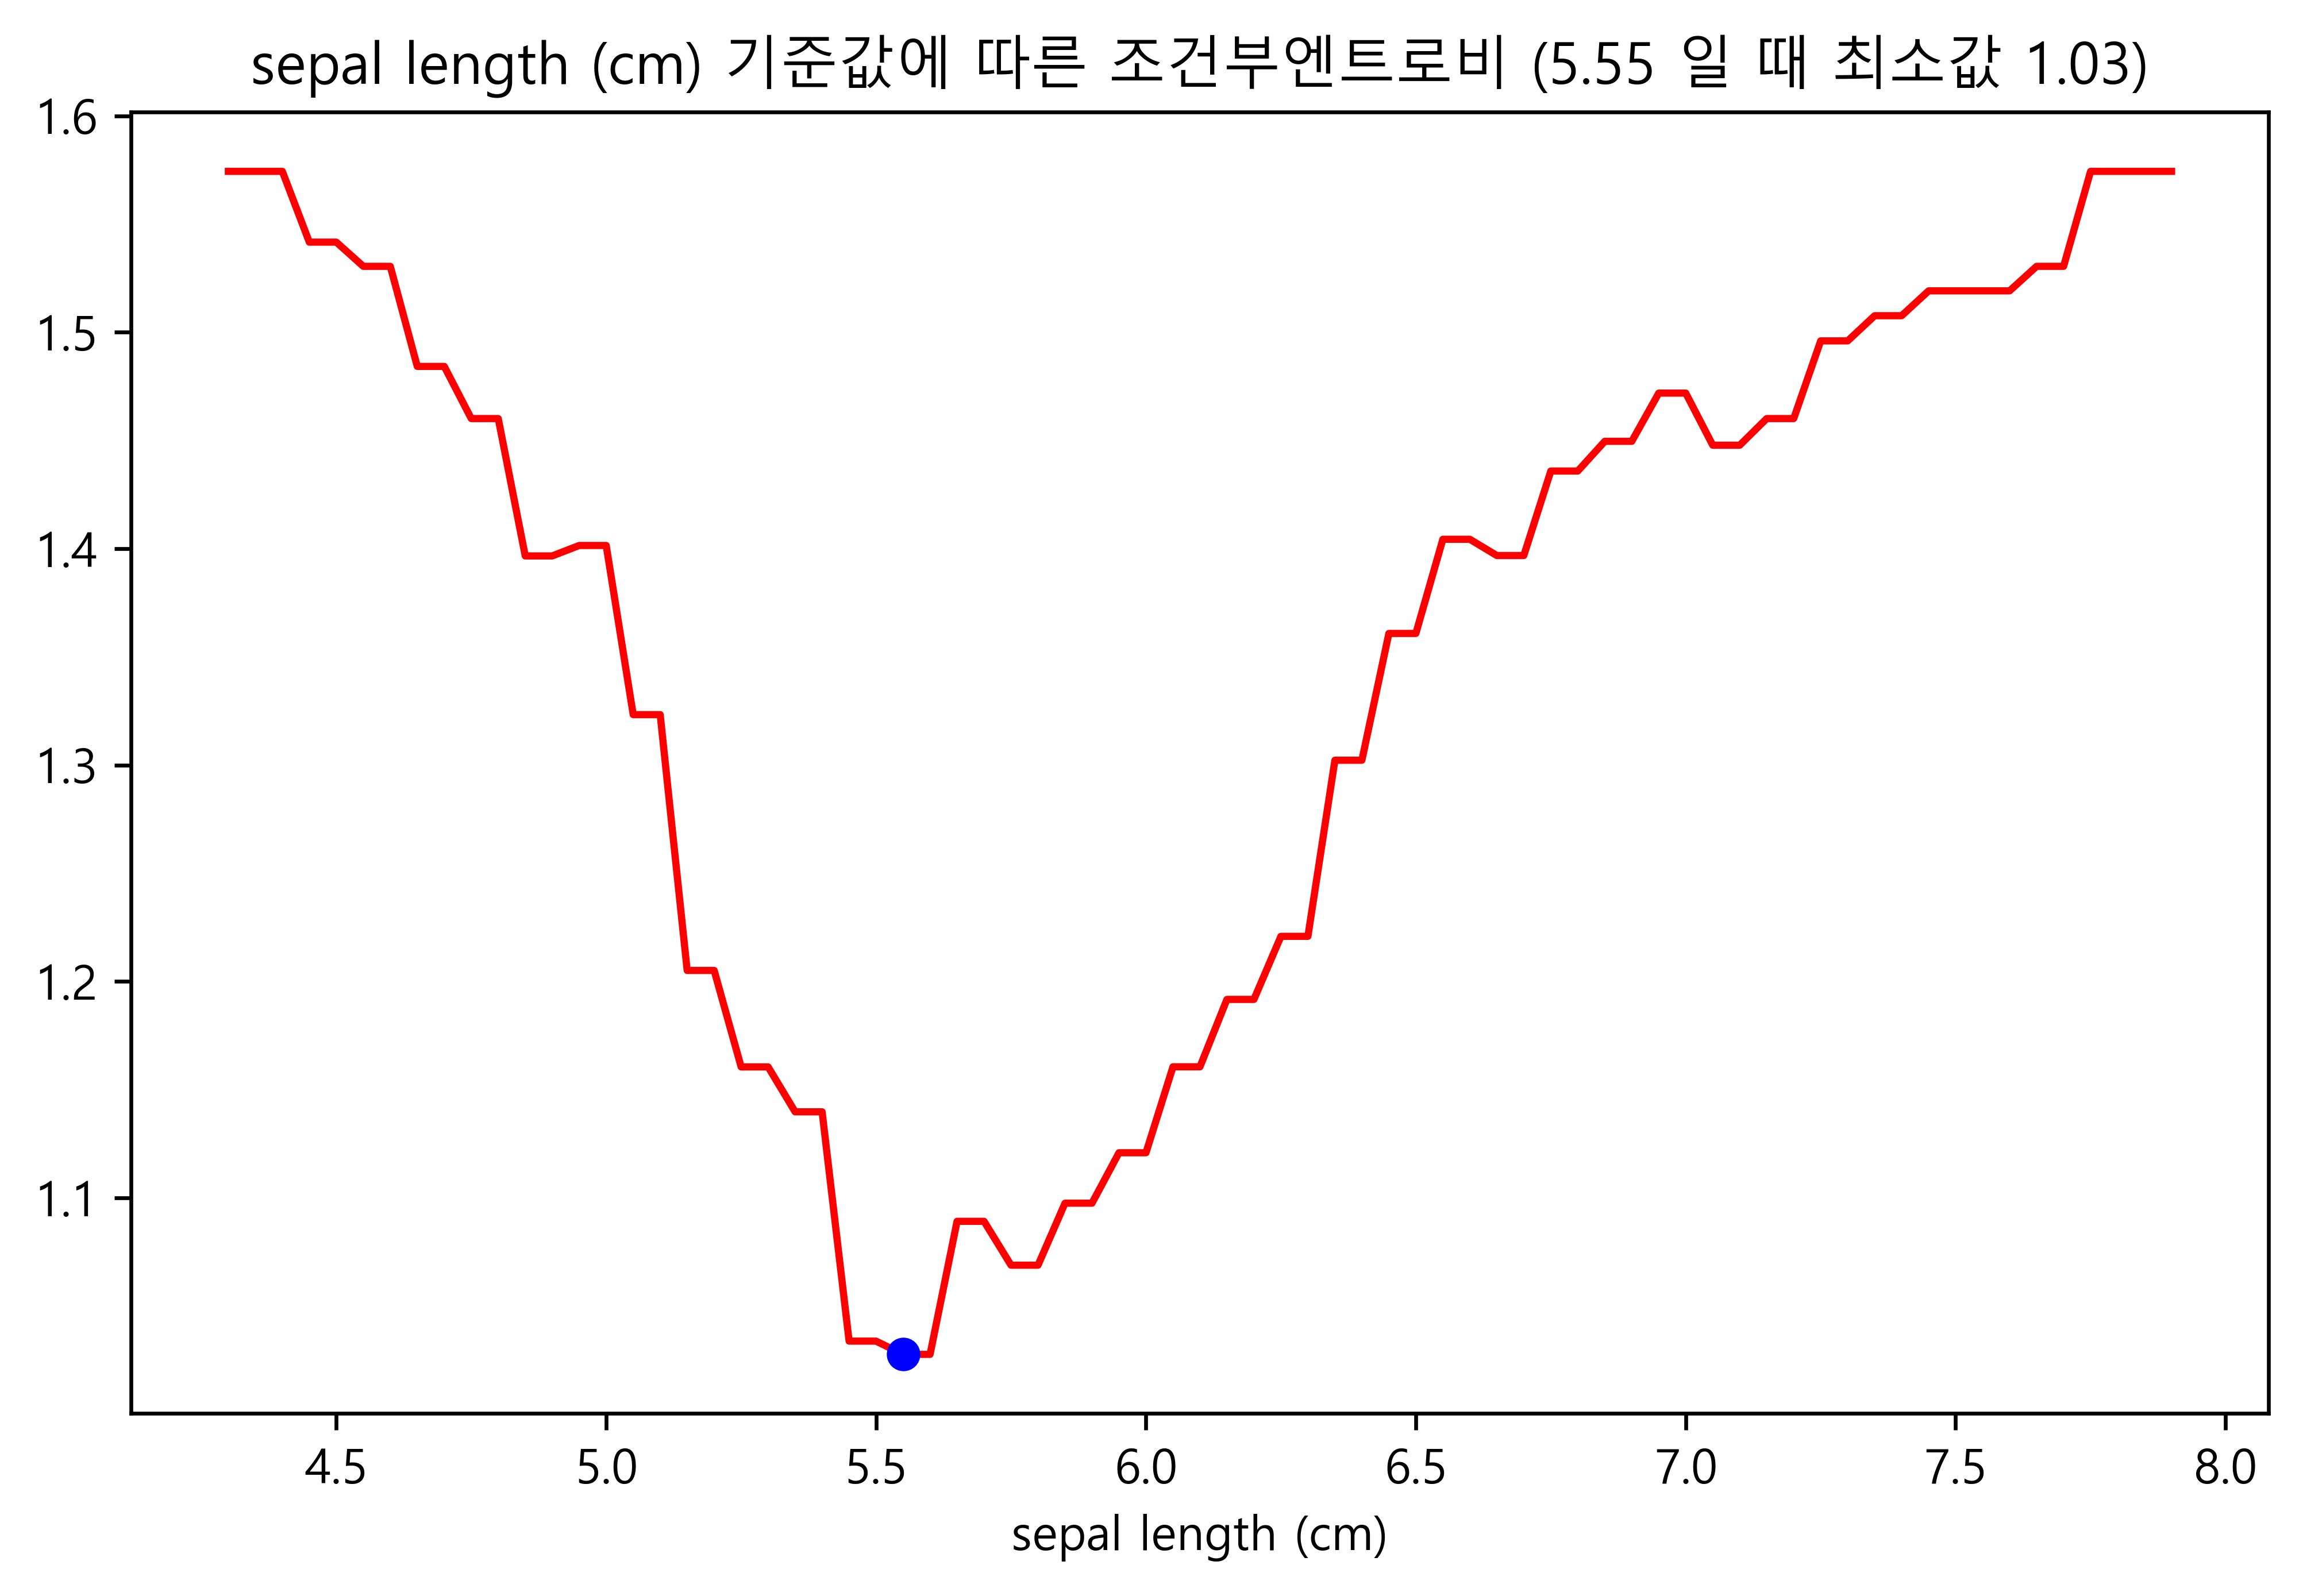

In [11]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df["species"] = iris.target

def calc_cond_entropies(col, threshold):
    df["X1"] = df[col] > threshold
    pivot_table1 = df.groupby(["X1", "species"]).size().unstack().fillna(0)
    v = pivot_table1.values
    pYX0 = v[0, :] / np.sum(v[0, :])
    pYX1 = v[1, :] / np.sum(v[1, :])
    HYX0 = sp.stats.entropy(pYX0, base=2)
    HYX1 = sp.stats.entropy(pYX1, base=2)
    HYX = np.sum(v, axis=1) @ [HYX0, HYX1] / np.sum(v)
    return HYX

def plot_min_cond_entropy(col):
    th_min = df[col].min()
    th_max = df[col].max()
    th_range = np.arange(th_min, th_max + 0.05, 0.05)
    
    cond_entropies = []
    for th in th_range:
        cond_entropies.append(calc_cond_entropies(col, th))
        
    id_min = np.argmin(cond_entropies)
    th_min = th_range[id_min]
    ce_min = np.min(cond_entropies)
    plt.plot(th_range, cond_entropies, "r-")
    plt.plot(th_min, ce_min, "bo")
    title = "{} 기준값에 따른 조건부엔트로비 ({:.3} 일 때 최소값 {:.3})".format(col, th_min, ce_min)
    plt.title(title)
    plt.xlabel(col)
    plt.show()
    
plot_min_cond_entropy("sepal length (cm)")